# Machine Learning - Assignment 3

## Artificial Neural Network

The aim of the assignment is to implement an artificial neural network (mostly) from scratch. This includes implementing or fixing the following:

* Add support for additional activation functions and their derivatives.
* Add support for loss functions and their derivative.
* Add the use of a bias in the forward propagation.
* Add the use of a bias in the backward propagation.

In addition, you will be doing the following as well:

* Test the algorithm on 3 datasets.
* Compare neural networks with and without scaling.
* Hyper-parameter tuning.

The forward and backward propagation is made to work through a single layer, and are re-used multiple times to work for multiple layers.

Follow the instructions and implement what is missing to complete the assignment. Some functions have been started to help you a little bit with the implementation.

**Note:** You might need to go back and forth during your implementation of the code. The structure is set up to make implementation easier, you might find yourself going back and and forth to change something to make it easier later on.

## Assignment preparations

We help you out with importing the libraries.

**IMPORTANT NOTE:** You may not import any more libraries than the ones already imported!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We set seed to better reproduce results later on.
np.random.seed(12345)

## Neural Network utility functions

### 1) Activation functions

Below is some setup for choosing activation function. Implement 2 additional activation functions, "ReLU" and one more of your choosing.

In [2]:
def relu(activations):
    return np.maximum(0, activations)

In [3]:
def sigmoid(activations):
	return np.divide(1, np.add(1, np.exp(-activations)))

In [4]:
def tanh(activations):
    return np.divide(np.subtract(np.exp(activations), np.exp(-activations)), np.add(np.exp(activations), np.exp(-activations)))

In [5]:
def isrlu(activations, alpha = 1):
    return np.where(np.greater_equal(activations, 0), activations, np.divide(activations, np.sqrt(np.add(1, np.multiply(alpha, np.square(activations))))))

In [38]:
def softmax(activations):
    exponents = np.exp(np.subtract(activations, np.max(activations, axis=1, keepdims=True)))
    return np.divide(exponents, np.sum(exponents, axis=1, keepdims=True))

In [39]:
# Activation functions
def activate(activations, selected_function = "None"):
    # if selected function is "None"
    y = activations
    if selected_function == "ReLU":
        # TODO: Implement the "ReLU" activation function
        y = relu(activations)
    elif selected_function == "Sigmoid":
        # TODO: Implement another activation function activation function of your own choice.
        y = sigmoid(activations)
    elif selected_function == "tanh":
        # TODO: Implement another activation function activation function of your own choice.
        y = tanh(activations)
    elif selected_function == "ISRLU":
        # TODO: Implement another activation function activation function of your own choice.
        y = isrlu(activations)
    elif selected_function == "Softmax":
        y = softmax(activations)
    return y

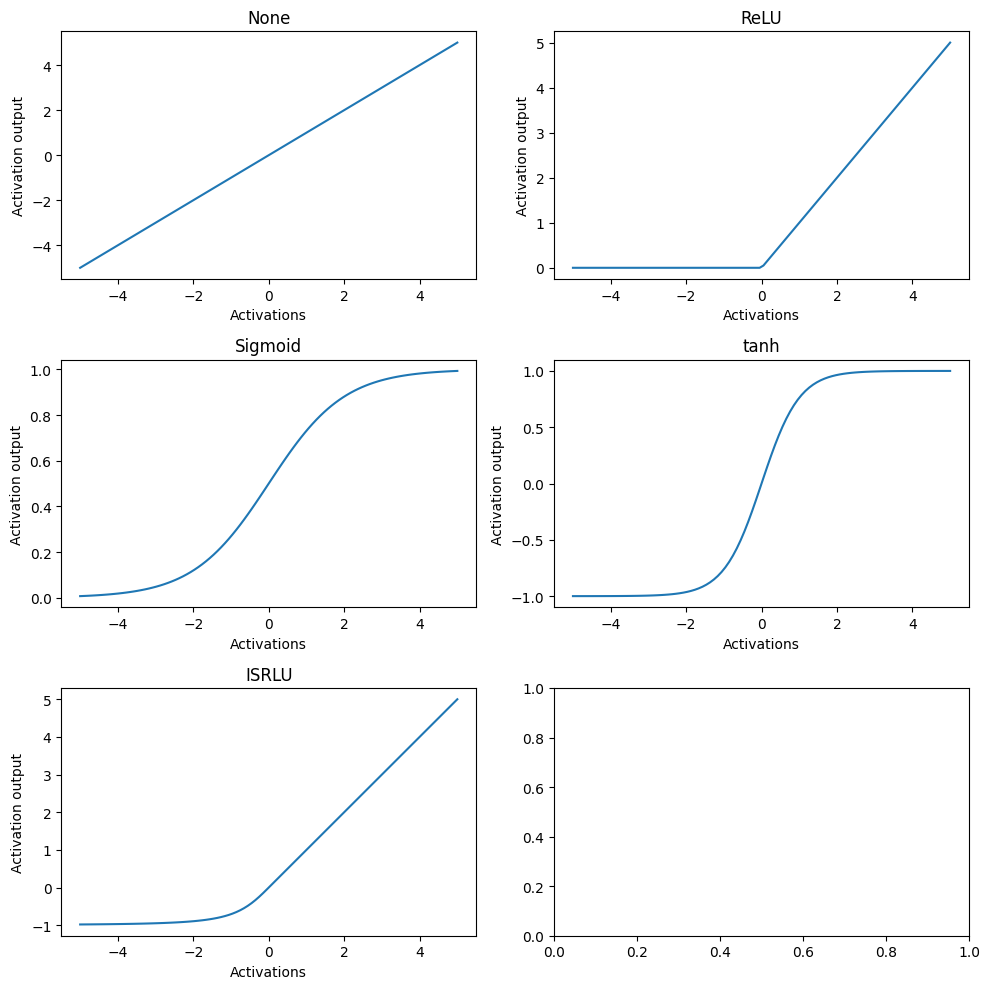

In [40]:
# TODO Test your activation functions, is the returning values what you expect?
activations = np.linspace(-5, 5, 100)
activation_functions = ["None", "ReLU", "Sigmoid", "tanh", "ISRLU"]

figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, activation_function in enumerate(activation_functions):
    y = activate(activations, selected_function=activation_function)
    axes[i].plot(activations, y)
    axes[i].set_title(activation_function)
    axes[i].set_xlabel("Activations")
    axes[i].set_ylabel("Activation output")

plt.tight_layout()
plt.show()

### 2) Activation function derivatives

Neural networks need both the activation function and its derivative. Finish the code below.

In [41]:
def d_relu(activations):
    return (activations > 0).astype(activations.dtype)

In [42]:
def d_sigmoid(activations):
    return np.multiply(sigmoid(activations), np.subtract(1, sigmoid(activations)))

In [43]:
def d_tanh(activations):
    return np.subtract(1, np.square(tanh(activations)))

In [44]:
def d_isrlu(activations):
    return np.where(np.greater_equal(activations, 0), 1, np.float_power(isrlu(activations), 3))

In [45]:
def d_activate(activations, selected_function = "None"):
    # if selected function is "None or Softmax"
    dy = np.ones_like(activations)
    if selected_function == "ReLU":
        # TODO: Implement the "ReLU" derivative
        dy = d_relu(activations)
    elif selected_function == "Sigmoid":
        # TODO: Implement the derivative of the activation function you chose yourself.
        dy = d_sigmoid(activations)
    elif selected_function == "tanh":
        # TODO: Implement the derivative of the activation function you chose yourself.
        dy = d_tanh(activations)
    elif selected_function == "ISRLU":
        # TODO: Implement the derivative of the activation function you chose yourself.
        dy = d_isrlu(activations)

    return dy

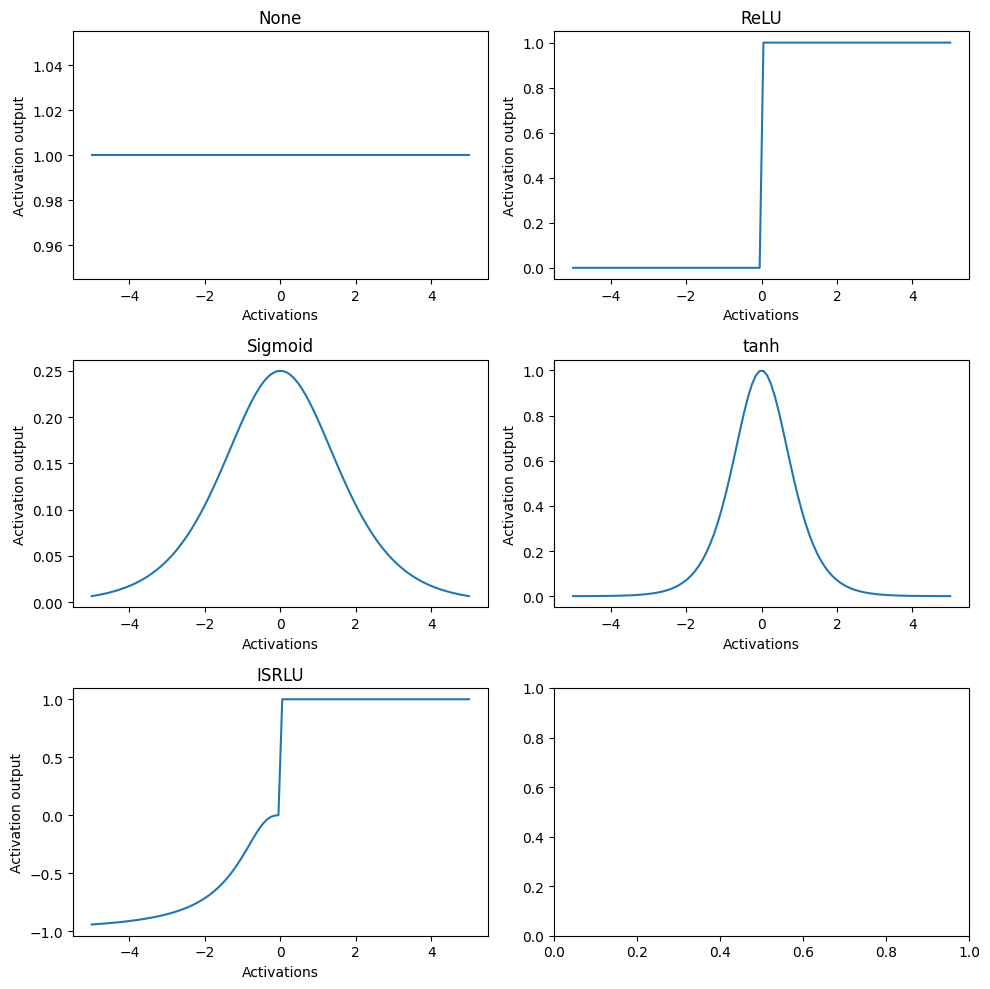

In [46]:
# TODO Test your activation function derivatives, is the returning values what you expect?
activation_functions = ["None", "ReLU", "Sigmoid", "tanh", "ISRLU"]

figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, activation_function in enumerate(activation_functions):
    y = d_activate(activations, selected_function=activation_function)
    axes[i].plot(activations, y)
    axes[i].set_title(activation_function)
    axes[i].set_xlabel("Activations")
    axes[i].set_ylabel("Activation output")

plt.tight_layout()
plt.show()

### 3) Loss functions

To penalize the network when it predicts incorrect, we need to meassure how "bad" the prediction is. This is done with loss-functions.

Similar as with the activation functions, the loss function needs its derivative as well.

Finish the MSE_loss (Mean Squared Error loss), as well as adding one additional loss function.

In [48]:
# This is the loss for a set of predictions y_hat compared to a set of real values y
def MSE_loss(y_hat, y):
    loss = np.mean(np.square(np.subtract(y_hat, y))) # TODO: Finish this function
    return loss

# TODO: Choose another loss function and implement it
def CCE_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-12, 1)
    loss = -np.mean(np.sum(np.multiply(y, np.log(y_hat)), axis=1))  # TODO: Finish this function
    return loss

# TODO: Choose another loss function and implement it
def BCE_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-12, 1 - 1e-12)
    loss = -np.mean(np.add(np.multiply(y, np.log(y_hat)), np.multiply((np.subtract(1, y)), np.log(np.subtract(1, y_hat)))))  # TODO: Finish this function
    return loss

# TODO: Choose another loss function and implement it
def SCE_loss(y_hat, y):
    size = y_hat.shape[0]
    y_hat = np.clip(y_hat, 1e-12, 1)
    y = y.astype(int)
    loss = -np.mean(
        np.log(y_hat[np.arange(size), y.ravel()])
    )  # TODO: Finish this function
    return loss

The derivatives of the loss is with respect to the predicted value **y_hat**.

In [49]:
def d_MSE_loss(y_hat, y):
    # TODO: Finish this function
    dy = np.multiply(2, np.divide(np.subtract(y_hat, y), y.shape[0]))
    return dy

# TODO: Choose another loss function and implement it
def d_CCE_loss(y_hat, y):
    dy = np.divide(np.subtract(y_hat, y), y.shape[0])
    return dy

# TODO: Choose another loss function and implement it
def d_BCE_loss(y_hat, y):
    # TODO: Finish this function
    y_hat = np.clip(y_hat, 1e-12, 1 - 1e-12)
    dy = np.add(-np.divide(y, y_hat), np.divide(np.subtract(1, y), np.subtract(1, y_hat)))
    dy = np.divide(dy, y.shape[0])
    return dy

# TODO: Choose another loss function and implement it
def d_SCE_loss(y_hat, y):
    n = y_hat.shape[0]
    grad = y_hat.copy()
    one_hot = np.zeros_like(y_hat)
    y = y.astype(int)
    one_hot[np.arange(n), y.ravel()] = 1
    dy = np.divide(np.subtract(grad, one_hot), n)
    return dy

### 4) Forward propagation

The first "fundamental" function for neural networks is to be able to propagate the data forward through the neural network. We will implement this function here.

In [50]:
def propagate_forward(weights, activations, bias, activation_function="None"):
    # TODO: Add support for the use of bias
    dot_product = np.dot(activations, weights) + bias
    new_activations = activate(dot_product, activation_function)
    return new_activations

### 5) Back-propagation

To be able to train a neural network, we need to be able to propagate the loss backwards and update the weights. We will implement this function here.

In [51]:
# Calculates the backward gradients that are passed throughout the layer in the backward pass.
# Returns both the derivative of the loss in respect to the weights and the input signal (activations).

def propagate_backward(weights, activations, dl_dz, bias, activation_function="None"):
    # NOTE: dl_dz is the derivative of the loss based on the previous layers activations/outputs
    # TODO: Add support for the use of bias
    dot_product = np.dot(activations, weights) + bias
    d_loss = d_activate(dot_product, activation_function) * dl_dz
    d_weights = np.dot(activations.T, d_loss)
    d_activations = np.dot(d_loss, weights.T)
    d_bias = np.sum(d_loss, axis=0, keepdims=True)
    return d_weights, d_activations, d_bias

## Neural network implementation

### 6) Fixing the neural network

Below is a class implementation of a MLP neural network. This implementation is still lacking several areas that are needed for the network to be robust and function well. Your task is to improve and fix it with the following:

1. Add a bias to the activation functions, and make sure the bias is also updated during training. 
2. Add a function that trains the network using minibatch (such that the neural network trains on a few samples at a time). 
3. Make use of an validation set in the training function. The model should stop training when the loss starts to increase for the validatin set. This feature should be able to be turned on and off to test the difference.


In [52]:
class NeuralNet(object):
    # Setup all parameters and activation functions.
    # This function runs directly when a new instance of this class is created.
    def __init__ (self, input_dim, output_dim, neurons = [], loss_function="MSE", output_activation="None"):

        # NOTE: The "neurons" parameter is given as a list.
        # E.g., [4, 8, 4] means 4 neurons in layer 1, 8 neurons in layer 2 etc...

        # TODO: Add support for bias for each neuron in the code below.
        self.weights = [np.random.normal(0,2,(n,m)) for n,m in zip([input_dim] + neurons, neurons + [output_dim])]
        self.activation_functions = ["ReLU"] * len(neurons) + [output_activation]
        self.biases = [np.zeros((1, n)) for n in (neurons + [output_dim])]
        self.loss_function = loss_function

    # Predict the input throughout the network and calculate the output.
    def forward(self, x):

        # TODO: Add support for a bias for each neuron in the code below.
        for layer_weights, layer_bias, layer_activation_function in zip(
            self.weights,
            self.biases,
            self.activation_functions,
        ):
            x = propagate_forward(layer_weights, x, layer_bias, layer_activation_function)

        return x

    # Adjust the weights in the network to better fit the desired output (y), given the input (x).
    # The weight updates are happening "in-place", thus we are only returning the loss from this function.
    # Note that this function can handle a variable size of the input (x), both full datasets or smaller parts of the dataset.
    def adjust_weights(self, x, y, learning_rate=1e-4):

        # TODO: Add support for a bias for each neuron and make sure these are learnt as well in the code below.

        activation = x
        activation_history = [] # NOTE: We need the previous (or intermediate) activations to make use of the "chain rule" (see lecture notes).

        for layer_weights, layer_bias, layer_activation_function in zip(self.weights, self.biases, self.activation_functions):
            activation_history.append(activation)
            activation = propagate_forward(layer_weights, activation, layer_bias, layer_activation_function)

        # NOTE: The "activation" variable is changing as we go forward in the neural network.

        if self.loss_function == "MSE":
            loss = MSE_loss(activation,y)
            d_activations = d_MSE_loss(activation,y) # NOTE: The final output can be "seen as" the final activations, thus the name.
        elif self.loss_function == "BCE":
            loss = BCE_loss(activation,y)
            d_activations = d_BCE_loss(activation,y) # NOTE: The final output can be "seen as" the final activations, thus the name.
        elif self.loss_function == "CCE":
            loss = CCE_loss(activation, y)
            d_activations = d_CCE_loss(
                activation, y
            )  # NOTE: The final output can be "seen as" the final activations, thus the name.
        elif self.loss_function == "SCE":
            loss = SCE_loss(activation, y)
            d_activations = d_SCE_loss(
                activation, y
            )  # NOTE: The final output can be "seen as" the final activations, thus the name.

        for i, (
            layer_weights,
            layer_bias,
            layer_activation_function,
            previous_activations,
        ) in reversed(
            list(
                enumerate(
                    zip(
                        self.weights,
                        self.biases,
                        self.activation_functions,
                        activation_history,
                    )
                )
            )
        ):

            d_weights, d_activations, d_bias = propagate_backward(layer_weights, previous_activations, d_activations, layer_bias, layer_activation_function)

            # NOTE: Here is where the weight update is happening.
            self.weights[i] = layer_weights - learning_rate * d_weights
            self.biases[i] = layer_bias - learning_rate * d_bias

        return loss

    # A function for the training of the network.
    def train_net(self, x, y, batch_size=32, epochs=100, learning_rate=1e-4, use_validation_data=False, early_stopping=3):
        losses = []
        accuracies = []
        # TODO: Add a training loop where the weights and biases of the network is learnt over several epochs.
        best_val_loss = float("inf")
        early_stop_cnt = 0
        if use_validation_data:
            X_train = x[: int(x.shape[0] * 0.8), :]
            y_train = y[: int(y.shape[0] * 0.8), :]

            X_val = x[X_train.shape[0] :]
            y_val = y[y_train.shape[0] :]
        else:
            X_train, y_train = x, y
        size = X_train.shape[0]
        for epoch in range(epochs):
            # TODO: Add support for mini batches. That is, in each epoch the data should be split into several
            #       smaller subsets and the model should be trained on each of these subsets one at a time.
            shuffle_idx = np.random.permutation(size)
            X_train = X_train[shuffle_idx, :]
            y_train = y_train[shuffle_idx, :]
            loss = 0
            accuracy = 0

            num_batches = X_train.shape[0] // batch_size

            X_batches = [
                X_train[i * batch_size : (i + 1) * batch_size]
                for i in range(num_batches)
            ]
            y_batches = [y_train[i * batch_size:(i + 1) * batch_size] for i in range(num_batches)]

            if X_train.shape[0] % batch_size != 0:
                X_batches = X_batches[:-1]
                y_batches = y_batches[:-1]

            for X_batch, y_batch in zip(X_batches, y_batches):
                loss += self.adjust_weights(X_batch, y_batch, learning_rate)
                y_pred = self.forward(X_batch)
                correct_pred = np.sum(y_batch.ravel() == np.argmax(y_pred, axis=1))
                accuracy += (correct_pred / y_batch.shape[0])

            losses.append(loss / num_batches)
            accuracies.append(accuracy / num_batches)
            print(f"Epoch {epoch + 1} - Loss: {losses[epoch]}")
            if use_validation_data:
                # TODO: Implement the use of validation data, that is, splitting the training data into training data and validation data.
                #       The validation data should be used to stop the training when the model stops to generalize and starts to overfit.
                #       This feature should be able to be turned on and off to test the difference.
                y_val_pred = self.forward(X_val)
                if self.loss_function == "MSE":
                    val_loss = MSE_loss(y_val_pred, y_val)
                elif self.loss_function == "BCE":
                    val_loss = BCE_loss(y_val_pred, y_val)
                elif self.loss_function == "CCE":
                    val_loss = CCE_loss(y_val_pred, y_val)
                elif self.loss_function == "SCE":
                    val_loss = SCE_loss(y_val_pred, y_val)
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    early_stop_cnt = 0
                else:
                    early_stop_cnt += 1
                    if early_stop_cnt == early_stopping:
                        print(
                            f"### EARLY STOP - Validation loss did not improve for {early_stopping} epochs! ###"
                        )
                        return losses, accuracies
        # NOTE: Make use of previously implemented functions here.
        return losses, accuracies

## Train Neural Networks

### 7) Simple test

In this a very simple test for you to use and toy around with before using the datasets.

Make sure to test both the **adjust_weights** function and the **train_net** function. What is the difference between the two?

Also, be sure to **plot the loss for each epoch** to see how the network training is progressing!

Start Loss: 31365.825846180418 End Loss: 9.233220052558988

Epoch 1 - Loss: 2748.6299245693594
Epoch 2 - Loss: 195.90507357623704
Epoch 3 - Loss: 142.83366630191298
Epoch 4 - Loss: 117.75897329912577
Epoch 5 - Loss: 102.49074398524318
Epoch 6 - Loss: 88.73177975025014
Epoch 7 - Loss: 80.53732371095245
Epoch 8 - Loss: 72.37733483763932
Epoch 9 - Loss: 65.50559248806262
Epoch 10 - Loss: 60.197720416061095
Epoch 11 - Loss: 55.41402046464796
Epoch 12 - Loss: 52.00978854058419
Epoch 13 - Loss: 47.90903952687406
Epoch 14 - Loss: 45.10716384328734
Epoch 15 - Loss: 42.12679368122874
Epoch 16 - Loss: 39.687684148809474
Epoch 17 - Loss: 37.657598027875316
Epoch 18 - Loss: 35.786886087611634
Epoch 19 - Loss: 33.86600224555164
Epoch 20 - Loss: 31.82946398025254
Epoch 21 - Loss: 31.127228970617715
Epoch 22 - Loss: 29.378866320258748
Epoch 23 - Loss: 28.724281547493405
Epoch 24 - Loss: 27.27779486571477
Epoch 25 - Loss: 25.97600581449984
Epoch 26 - Loss: 25.571044700184288
Epoch 27 - Loss: 24.416923

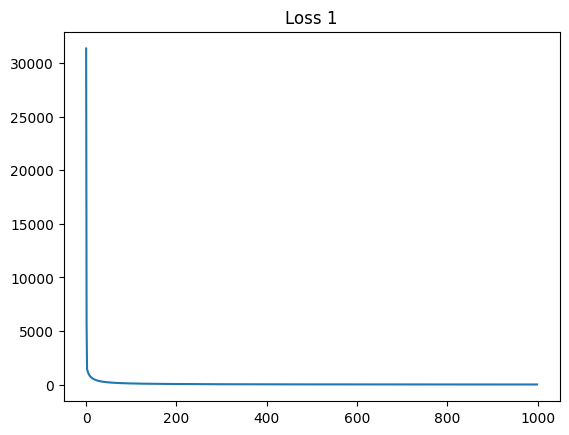

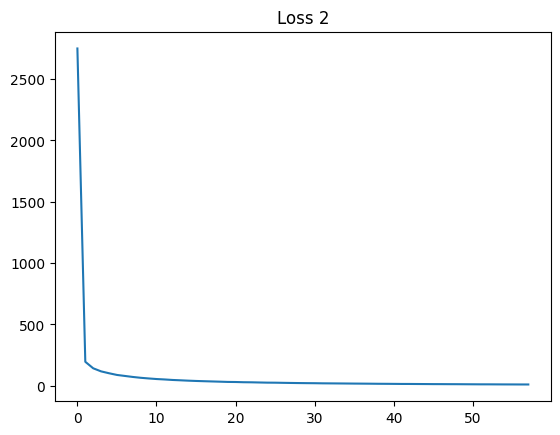

In [53]:
# TODO: You can change most things in this cell if you want to, we encourage it!

n = 1000
d = 4

k = np.random.randint(0,10,(d,1))
x = np.random.normal(0,1,(n,d))
y = np.dot(x,k) + 0.1 + np.random.normal(0,0.01,(n,1))

nn = NeuralNet(d, 1, [18, 12])

loss_1 = [nn.adjust_weights(x, y) for _ in range(1000)] 
print(f"Start Loss: {loss_1[0]} End Loss: {loss_1[-1]}\n")

nn2 = NeuralNet(d, 1, [18, 12])

loss_2, accuracies = nn2.train_net(
    x, y, epochs=100, use_validation_data=True, early_stopping=5
)  # TODO: Use the train_net function to compare with the "adjust_weights" function.

plt.plot(loss_1)
plt.title("Loss 1")
plt.show()

plt.plot(loss_2)
plt.title("Loss 2")
plt.show()

### Real test and preprocessing

When using real data and neural networks, it is very important to scale the data between smaller values, usually between 0 and 1. This is because neural networks struggle with larger values as input compared to smaller values. 

To test this, we will use our first dataset and test with and without scaling.

Similar as with assignment 2, we will use the scikit-learn library for this preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html

### 8) Dataset 1: Wine - with and without scaling

Wine dataset: https://archive.ics.uci.edu/dataset/109/wine

Train two neural network, one with scaling and one without. Are we able to see any difference in training results or loss over time?

**Note:** Do not train for to many epochs (more than maybe 50-100). The network might "learn" anyway in the end, but you should still be able to see a difference when training.

Neural Net 1:
Epoch 1 - Loss: 8.947885841882583
Epoch 2 - Loss: 0.9466274435158313
Epoch 3 - Loss: 0.9383713042244993
Epoch 4 - Loss: 0.9324278332533166
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Neural Net 2:
Epoch 1 - Loss: 10.82077228173264
Epoch 2 - Loss: 2.0895238128586846
Epoch 3 - Loss: 1.8311817363174112
Epoch 4 - Loss: 0.5060108088103806
Epoch 5 - Loss: 0.20092435719265955
Epoch 6 - Loss: 0.14885831704362373
Epoch 7 - Loss: 1.5381663199463544e-08
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Accuracy Neural Net 1: 0.4444444444444444
Accuracy Neural Net 2: 0.9166666666666666
Accuracy of sklearn's MLPClassifier: 0.5555555555555556
Accuracy of sklearn's MLPClassifier with normalized data: 0.8611111111111112
Neural Net 1:
Epoch 1 - Loss: 10.353579345784322
Epoch 2 - Loss: 0.9425287012042913
Epoch 3 - Loss: 0.938664499310043
Epoch 4 - Loss: 0.9350444237344064
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Neural Net 2

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neura

Accuracy of sklearn's MLPClassifier with normalized data: 0.9722222222222222
Neural Net 1:
Epoch 1 - Loss: 8.120728843260123
Epoch 2 - Loss: 0.9384251482094642
Epoch 3 - Loss: 0.9323679561118652
Epoch 4 - Loss: 0.9306287745145132
Epoch 5 - Loss: 0.9354032166073504
Epoch 6 - Loss: 0.9406066903648121
Epoch 7 - Loss: 0.9248187923716292
Epoch 8 - Loss: 0.9335403755297634
Epoch 9 - Loss: 0.9273187781118725
Epoch 10 - Loss: 0.922724139904032
Epoch 11 - Loss: 0.9251859616174458
Epoch 12 - Loss: 0.937741742892591
Epoch 13 - Loss: 0.9356004851460965
Epoch 14 - Loss: 0.9236425989764888
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Neural Net 2:
Epoch 1 - Loss: 8.735695389564794
Epoch 2 - Loss: 1.9427701362009242
Epoch 3 - Loss: 1.084344092119361
Epoch 4 - Loss: 0.3585347731219185
Epoch 5 - Loss: 0.2367580718710525
Epoch 6 - Loss: 0.14022962885356396
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Accuracy Neural Net 1: 0.1111111111111111
Accuracy Neural Ne

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neura

Epoch 67 - Loss: 2.610077919467747e-06
Epoch 68 - Loss: 2.570628380997221e-06
Epoch 69 - Loss: 2.5337880482485475e-06
Epoch 70 - Loss: 1.3055751652720482e-06
Epoch 71 - Loss: 2.457906259123941e-06
Epoch 72 - Loss: 2.446766879653656e-06
Epoch 73 - Loss: 1.1738931642023037e-06
Epoch 74 - Loss: 2.3946087761359462e-06
Epoch 75 - Loss: 1.1171700839675101e-06
Accuracy Neural Net 1: 0.4166666666666667
Accuracy Neural Net 2: 0.9722222222222222
Accuracy of sklearn's MLPClassifier: 0.3333333333333333
Accuracy of sklearn's MLPClassifier with normalized data: 0.9722222222222222
Mean Accuracy Neural Net 1: 0.37222222222222223
Mean Accuracy Neural Net 2: 0.8833333333333334
Mean Accuracy Sklearn Neural Net 1: 0.4027777777777778
Mean Accuracy Sklearn Neural Net 2: 0.85


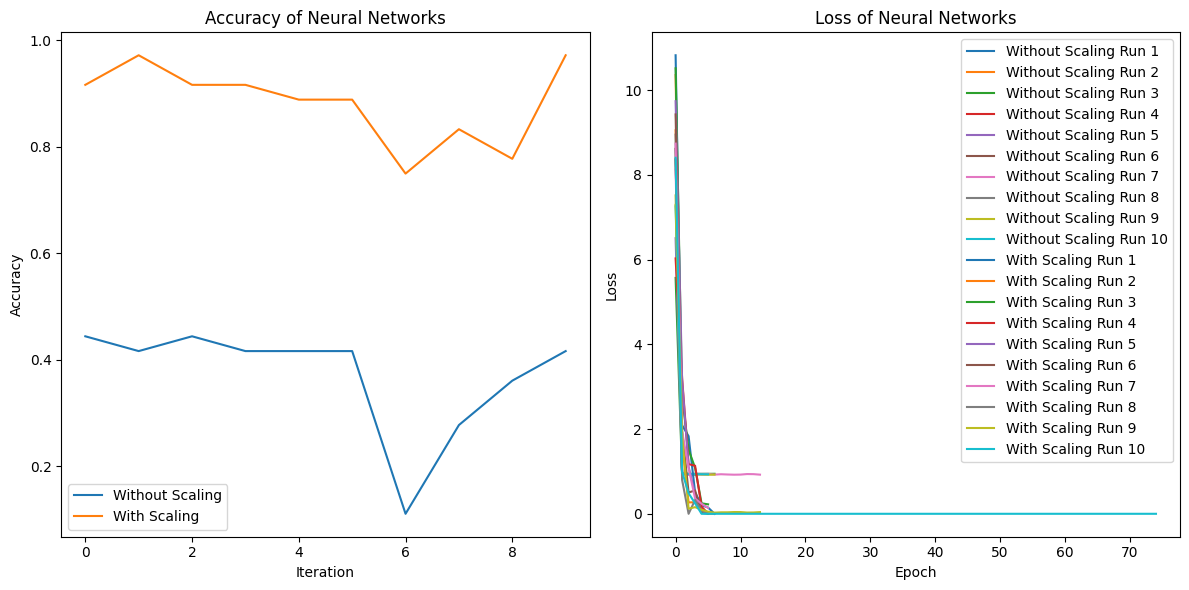

In [54]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

data_wine = pd.read_csv("wine.csv", skiprows=[1]).to_numpy()
features = data_wine[:, :-1]
labels = data_wine[:, -1:]

neurons = [18, 12]
accuracies_nn1 = []
accuracies_nn2 = []
accuracies_sk_nn1 = []
accuracies_sk_nn2 = []
losses_nn1 = []
losses_nn2 = []
RUNS = 10

# TODO: Do the above at least 3 times
# NOTE: Use loops here!
for _ in range(RUNS):
    # TODO: Set up the data and split it into train and test-sets.
    # TODO: Train and test your neural networks.
    # NOTE: Use the same train/test split for both neural network models!
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, train_size=0.8, shuffle=True
    )

    # Change labels to be 0 indexed
    y_train = y_train - 1
    y_test = y_test - 1

    scaler = preprocessing.StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.fit_transform(X_test)

    input_dim = X_train.shape[1]
    output_dim = len(np.unique(y_train))

    nn1 = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons, loss_function="SCE", output_activation="Softmax")
    nn2 = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons, loss_function="SCE", output_activation="Softmax")

    print("Neural Net 1:")
    loss_1, _ = nn1.train_net(
        X_train,
        y_train,
        batch_size=16,
        epochs=75,
        learning_rate=0.1,
        use_validation_data=True,
        early_stopping=3,
    )
    losses_nn1.append(loss_1)

    print("Neural Net 2:")
    loss_2, _ = nn2.train_net(
        X_train_norm,
        y_train,
        batch_size=16,
        epochs=75,
        use_validation_data=True,
        early_stopping=3,
        learning_rate=0.1
    )
    losses_nn2.append(loss_2)

    y_pred = nn1.forward(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    accuracy_nn1 = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred)
    print("Accuracy Neural Net 1:", accuracy_nn1)
    accuracies_nn1.append(accuracy_nn1)

    y_pred_norm = nn2.forward(X_test_norm)
    y_pred_norm = np.argmax(y_pred_norm, axis=1)
    accuracy_nn2 = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred_norm)
    print("Accuracy Neural Net 2:", accuracy_nn2)
    accuracies_nn2.append(accuracy_nn2)

    mlp = MLPClassifier(hidden_layer_sizes=(26, 10), max_iter=75)
    mlp.fit(X_train, y_train.ravel())

    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test.ravel(), y_pred)
    print("Accuracy of sklearn's MLPClassifier:", accuracy)
    accuracies_sk_nn1.append(accuracy)

    mlp_norm = MLPClassifier(hidden_layer_sizes=(26, 10), max_iter=75)
    mlp_norm.fit(X_train_norm, y_train.ravel())

    y_pred_norm = mlp_norm.predict(X_test_norm)
    accuracy_norm = accuracy_score(y_test.ravel(), y_pred_norm)
    print("Accuracy of sklearn's MLPClassifier with normalized data:", accuracy_norm)
    accuracies_sk_nn2.append(accuracy_norm)

print("Mean Accuracy Neural Net 1:", np.mean(accuracies_nn1))
print("Mean Accuracy Neural Net 2:", np.mean(accuracies_nn2))
print("Mean Accuracy Sklearn Neural Net 1:", np.mean(accuracies_sk_nn1))
print("Mean Accuracy Sklearn Neural Net 2:", np.mean(accuracies_sk_nn2))

# TODO: Plot the results with matplotlib (plt)
# NOTE: One combined lineplot with the scaling and one without the scaling, 2 plots in total.
# NOTE: Plot both the accuracy and the loss!
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(accuracies_nn1, label="Without Scaling")
plt.plot(accuracies_nn2, label="With Scaling")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy of Neural Networks")
plt.legend()

plt.subplot(1, 2, 2)
for i, loss in enumerate(losses_nn1):
    plt.plot(loss, label=f"Without Scaling Run {i+1}")
for i, loss in enumerate(losses_nn2):
    plt.plot(loss, label=f"With Scaling Run {i+1}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Neural Networks")
plt.legend()

plt.tight_layout()
plt.show()

### Real data and hyper-parameter tuning

Now we are going to use real data, preprocess it, and do hyper-parameter tuning.

Choose two hyper-parameters to tune to try and achive an even better result.

**NOTE:** Changing the number of epochs should be part of the tuning, but it does not count towards the two hyper parameters.

### 9) Dataset 2: Mushroom

Mushroom dataset: https://archive.ics.uci.edu/dataset/73/mushroom

Note: This dataset has one feature with missing values. Remove this feature.

/home/joel/.local/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


My Neural Net:
Epoch 1 - Loss: 0.6235889536468578
Epoch 2 - Loss: 0.10799959900196832
Epoch 3 - Loss: 0.01997637915118867
Epoch 4 - Loss: 0.02128738992131012
Epoch 5 - Loss: 7.209644727925021e-05
Epoch 6 - Loss: 0.0
Epoch 7 - Loss: 0.0
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Accuracy My Neural Net: 1.0
Accuracy of sklearn's MLPClassifier: 1.0


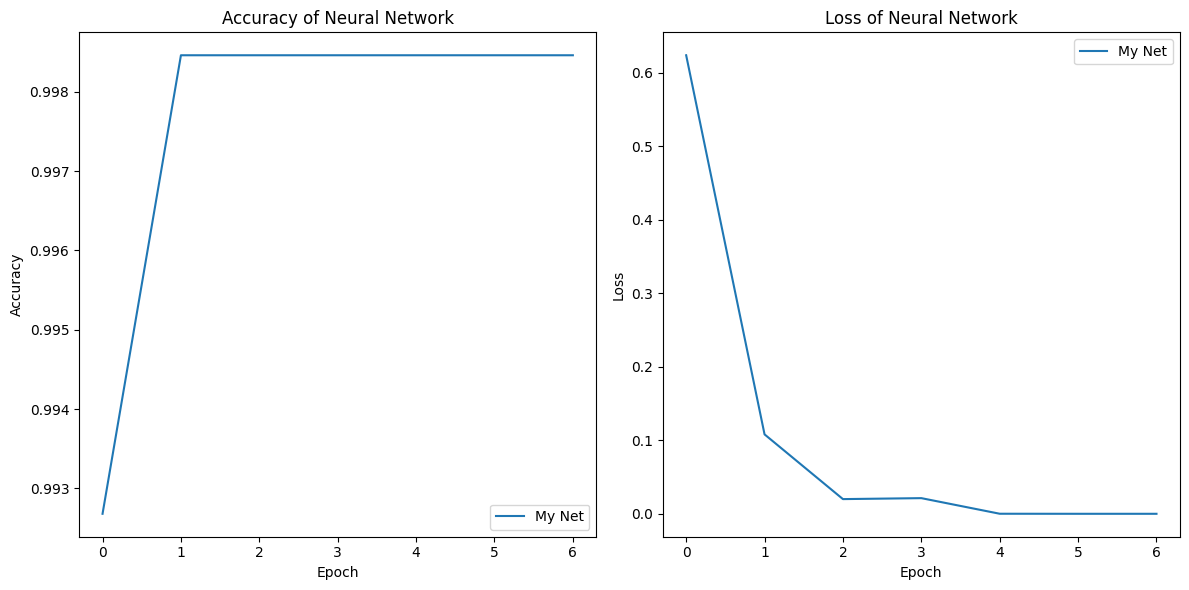

In [55]:
# TODO: Preprocess the data.
data_mushroom = (
    pd.read_csv("mushroom.csv", delimiter=",", na_values='?').dropna(axis=1).to_numpy()
)

features = data_mushroom[:, 1:]
labels = data_mushroom[:, 0:1]

enc = preprocessing.OneHotEncoder(sparse_output=False)
enc_features = enc.fit_transform(features)

label_encoder = preprocessing.LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = encoded_labels.reshape(-1, 1)

# TODO: Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    enc_features, encoded_labels, train_size=0.8, shuffle=True
)
# TODO: Train a neural network on the data
neurons = [124, 50]
accuracies_nn = []
accuracies_sk_nn = []
losses_sk_nn = []

input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))

nn = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons, loss_function="SCE", output_activation="Softmax")

print("My Neural Net:")
my_loss, epoch_accuracies = nn.train_net(
    X_train,
    y_train,
    batch_size=8,
    epochs=75,
    learning_rate=0.01,
    use_validation_data=True,
    early_stopping=3,
)

y_pred = nn.forward(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_nn = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred)
print("Accuracy My Neural Net:", accuracy_nn)
accuracies_nn.append(accuracy_nn)

mlp = MLPClassifier(hidden_layer_sizes=(21, 10), max_iter=75)
mlp.fit(X_train, y_train.ravel())

y_pred = mlp.predict(X_test)
accuracy_sk = accuracy_score(y_test.ravel(), y_pred)
print("Accuracy of sklearn's MLPClassifier:", accuracy_sk)

# TODO: Visualize the loss for each epoch
# TODO: Visualize the test accuracy for each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_accuracies, label="My Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Neural Network")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(my_loss, label="My Net")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Neural Network")
plt.legend()

plt.tight_layout()
plt.show()

When hyper-parameter tuning, please write the parameters and network sizes you test here:

* Parameter 1: Batch Size
* Parameter 2: Learning Rate

* Neural network sizes: [124, 50]

Epoch 1 - Loss: 0.8620234250478924
Epoch 2 - Loss: 0.6928185885557061
Epoch 3 - Loss: 0.6933452050246127
Epoch 4 - Loss: 0.6930113017884041
Epoch 5 - Loss: 0.6933545395643205
Epoch 6 - Loss: 0.6929845525496933
Epoch 7 - Loss: 0.6923820548751344
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Batch Size: 8
Learning Rate: 0.1
Accuracy: 0.4849230769230769
Epoch 1 - Loss: 0.5872409693585027
Epoch 2 - Loss: 0.0884106885834305
Epoch 3 - Loss: 0.01464701376617686
Epoch 4 - Loss: 3.4919928661210794e-08
Epoch 5 - Loss: 3.183412981083471e-08
Epoch 6 - Loss: 2.9261177665742403e-08
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Batch Size: 8
Learning Rate: 0.01
Accuracy: 0.9981538461538462
Epoch 1 - Loss: 1.9879700810373602
Epoch 2 - Loss: 0.41561067594135237
Epoch 3 - Loss: 0.19716149008149425
Epoch 4 - Loss: 0.1034078757640527
Epoch 5 - Loss: 0.08798578155581656
Epoch 6 - Loss: 0.05310333378017543
Epoch 7 - Loss: 0.01866192632700079
Epoch 8 - Loss: 0.023720

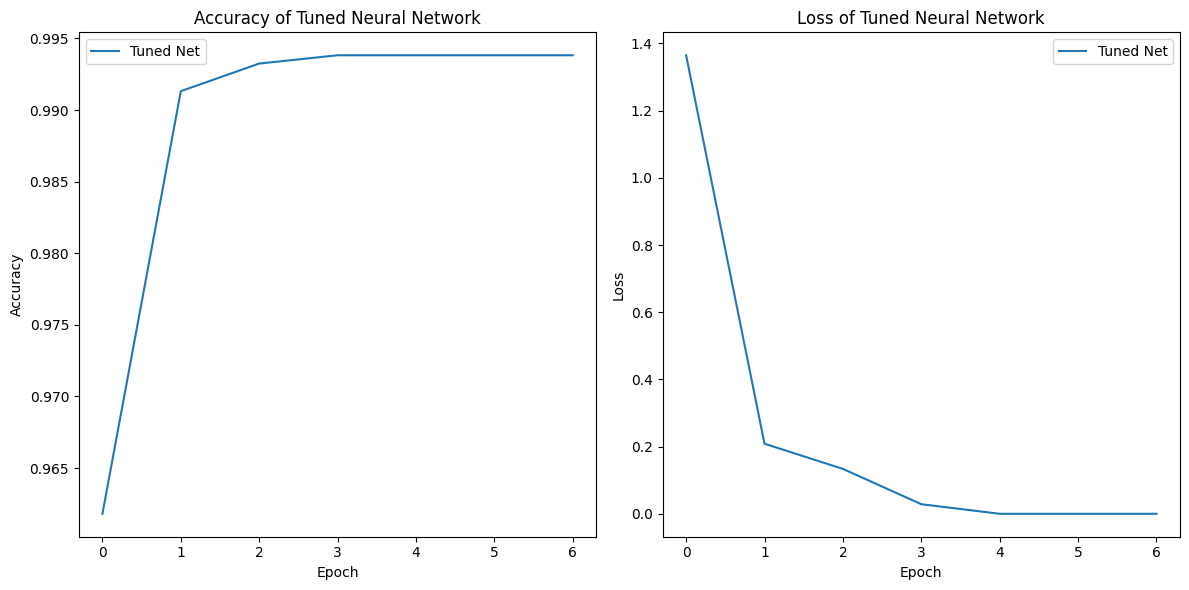

In [56]:
# TODO: Hyper-parameter tuning
params = {
    "Batch Size": [8, 16, 32, 64],
    "Learning Rate": [0.1, 0.01, 0.001, 0.0001],
}

best_params = {
    "Batch Size": [],
    "Learning Rate": [],
    "Accuracy": [],
}

for batch_size in params["Batch Size"]:
    for learning_rate in params["Learning Rate"]:
        nn = NeuralNet(
            input_dim=input_dim,
            output_dim=output_dim,
            neurons=neurons,
            loss_function="SCE",
            output_activation="Softmax",
        )
        _, _ = nn.train_net(
            X_train,
            y_train,
            batch_size=batch_size,
            epochs=75,
            learning_rate=learning_rate,
            use_validation_data=True,
            early_stopping=3,
        )
        y_pred = nn.forward(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        accuracy = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred)
        print("Batch Size:", batch_size)
        print("Learning Rate:", learning_rate)
        print("Accuracy:", accuracy)

        best_params["Batch Size"].append(batch_size)
        best_params["Learning Rate"].append(learning_rate)
        best_params["Accuracy"].append(accuracy)

best_accuracy = max(best_params["Accuracy"])
best_index = best_params["Accuracy"].index(best_accuracy)

print("Best Parameter Values:")
print("Best Batch Size:", best_params["Batch Size"][best_index])
print("Best Learning Rate:", best_params["Learning Rate"][best_index])
print("Best Accuracy:", best_accuracy)

print("Hyper-Parameter Tuned Neural Net:")
nn = NeuralNet(
    input_dim=input_dim,
    output_dim=output_dim,
    neurons=neurons,
    loss_function="SCE",
    output_activation="Softmax",
)
loss, epoch_accuracies = nn.train_net(
    X_train,
    y_train,
    batch_size=best_params["Batch Size"][best_index],
    epochs=75,
    learning_rate=best_params["Learning Rate"][best_index],
    use_validation_data=True,
    early_stopping=3,
)
y_pred = nn.forward(X_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy:", accuracy_score(y_true=y_test.ravel(), y_pred=y_pred))

# TODO: Visualize the loss after hyper-parameter tuning for each epoch
# TODO: Visualize the test accuracy after hyper-parameter tuning for each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_accuracies, label="Tuned Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Tuned Neural Network")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label="Tuned Net")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Tuned Neural Network")
plt.legend()

plt.tight_layout()
plt.show()

### 10) Dataset 3: Adult

Adult dataset: https://archive.ics.uci.edu/dataset/2/adult

**IMPORTANT NOTE:** This dataset is much larger than the previous two (48843 instances). If your code runs slow on your own computer, you may exclude parts of this dataset, but you must keep a minimum of 10000 datapoints.

My Neural Net:
Epoch 1 - Loss: 0.7237100325610544
Epoch 2 - Loss: 0.5521196767567039
Epoch 3 - Loss: 0.5516330098135336
Epoch 4 - Loss: 0.551809740670873
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Accuracy My Neural Net: 0.7609786057938377
Accuracy of sklearn's MLPClassifier: 0.8318149247620023


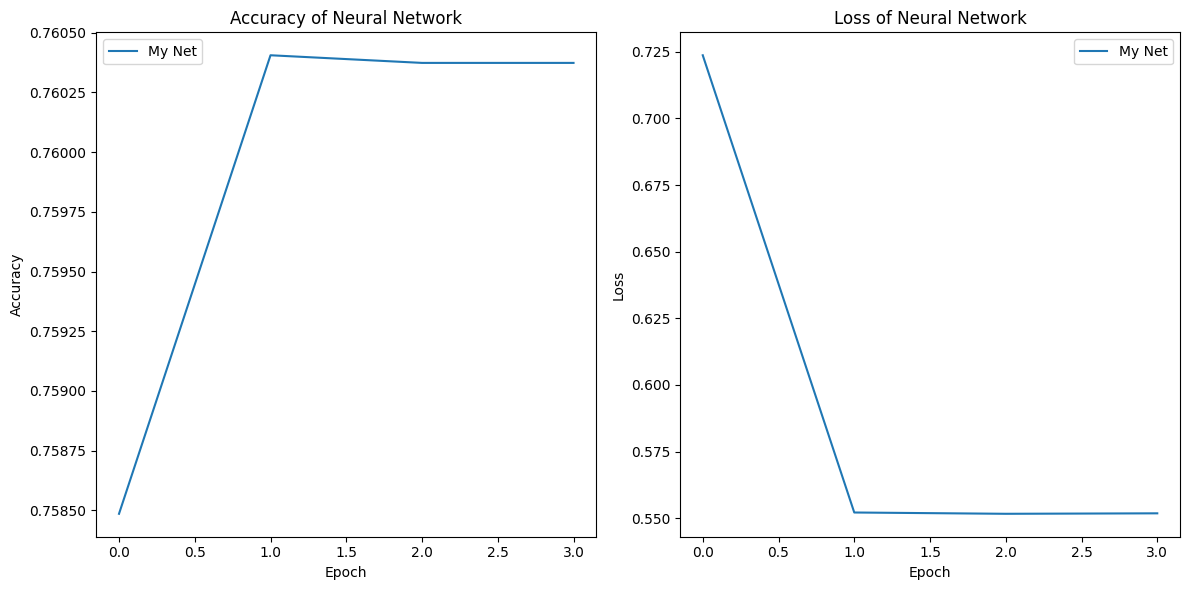

In [57]:
from sklearn.compose import ColumnTransformer
data_adult = (
    pd.read_csv("adult.csv")
    .drop(columns=["fnlwgt", "education"])
)  # TODO: Read the data.

# TODO: Preprocess the data.
ct = ColumnTransformer(
	transformers=[("onehot", preprocessing.OneHotEncoder(sparse_output=False), ["workclass", "marital-status", "occupation", "relationship", "race", "gender", "native-country"])],
	remainder="passthrough"
)
enc_features = ct.fit_transform(data_adult.drop(columns=["income"]))

label_encoder = preprocessing.LabelEncoder() 
enc_labels = label_encoder.fit_transform(data_adult["income"]).reshape(-1, 1)

# TODO: Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    enc_features, enc_labels, train_size=0.8, shuffle=True
)

neurons = [100, 50]
accuracies_nn = []
accuracies_sk_nn = []
losses_sk_nn = []

input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))

nn = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons, loss_function="SCE", output_activation="Softmax")

# TODO: Train a neural network on the data
print("My Neural Net:")
my_loss, epoch_accuracies = nn.train_net(
    X_train,
    y_train,
    batch_size=32,
    epochs=75,
	learning_rate=0.001,
    use_validation_data=True,
    early_stopping=3,
)

y_pred = nn.forward(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_nn = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred)
print("Accuracy My Neural Net:", accuracy_nn)
accuracies_nn.append(accuracy_nn)

mlp = MLPClassifier(hidden_layer_sizes=(21, 10), max_iter=75)
mlp.fit(X_train, y_train.ravel())

y_pred = mlp.predict(X_test)
accuracy_sk = accuracy_score(y_test.ravel(), y_pred)
print("Accuracy of sklearn's MLPClassifier:", accuracy_sk)

# TODO: Visualize the loss for each epoch
# TODO: Visualize the test accuracy for each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_accuracies, label="My Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Neural Network")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(my_loss, label="My Net")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Neural Network")
plt.legend()

plt.tight_layout()
plt.show()

When hyper-parameter tuning, please write the parameters and network sizes you test here:

* Parameter 1: Batch Size
* Parameter 2: Learning Rate

* Neural network sizes: neurons = [100, 50]

Epoch 1 - Loss: 0.5919494292830305
Epoch 2 - Loss: 0.5507622056681272
Epoch 3 - Loss: 0.5507400939573258
Epoch 4 - Loss: 0.5508482359420117
Epoch 5 - Loss: 0.550683887945085
Epoch 6 - Loss: 0.5507810623941788
Epoch 7 - Loss: 0.5506949018275291
Epoch 8 - Loss: 0.5508845692447838
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Batch Size: 8
Learning Rate: 0.1
Accuracy: 0.7609786057938377
Epoch 1 - Loss: 0.6489886963309768
Epoch 2 - Loss: 0.5496945726868276
Epoch 3 - Loss: 0.5497389725875955
Epoch 4 - Loss: 0.5496523557158056
Epoch 5 - Loss: 0.5496266142086678
Epoch 6 - Loss: 0.5496817457299701
Epoch 7 - Loss: 0.5495877246808455
Epoch 8 - Loss: 0.5495439492785775
Epoch 9 - Loss: 0.5496502480198603
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Batch Size: 8
Learning Rate: 0.01
Accuracy: 0.7609786057938377
Epoch 1 - Loss: 0.6457578314576286
Epoch 2 - Loss: 0.5513453322821302
Epoch 3 - Loss: 0.5495732031880218
Epoch 4 - Loss: 0.5495748957843226
Epoch 5

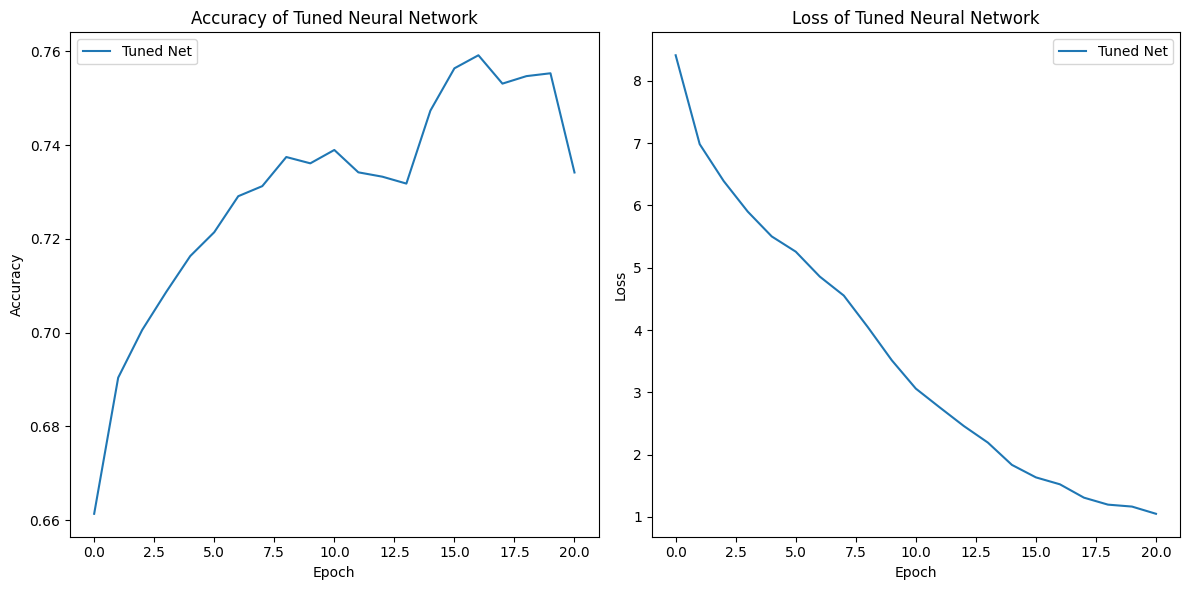

In [58]:
# TODO: Hyper-parameter tuning
params = {
    "Batch Size": [8, 16, 32, 64],
    "Learning Rate": [0.1, 0.01, 0.001, 0.0001],
}

best_params = {
    "Batch Size": [],
    "Learning Rate": [],
    "Accuracy": [],
}

for batch_size in params["Batch Size"]:
    for learning_rate in params["Learning Rate"]:
        nn = NeuralNet(
            input_dim=input_dim,
            output_dim=output_dim,
            neurons=neurons,
            loss_function="SCE",
            output_activation="Softmax",
        )
        _, _ = nn.train_net(
            X_train,
            y_train,
            batch_size=batch_size,
            epochs=75,
            learning_rate=learning_rate,
            use_validation_data=True,
            early_stopping=3,
        )
        y_pred = nn.forward(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        accuracy = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred)
        print("Batch Size:", batch_size)
        print("Learning Rate:", learning_rate)
        print("Accuracy:", accuracy)

        best_params["Batch Size"].append(batch_size)
        best_params["Learning Rate"].append(learning_rate)
        best_params["Accuracy"].append(accuracy)

best_accuracy = max(best_params["Accuracy"])
best_index = best_params["Accuracy"].index(best_accuracy)

print("Best Parameter Values:")
print("Best Batch Size:", best_params["Batch Size"][best_index])
print("Best Learning Rate:", best_params["Learning Rate"][best_index])
print("Best Accuracy:", best_accuracy)

print("Hyper-Parameter Tuned Neural Net:")
nn = NeuralNet(
    input_dim=input_dim,
    output_dim=output_dim,
    neurons=neurons,
    loss_function="SCE",
    output_activation="Softmax",
)
loss, epoch_accuracies = nn.train_net(
    X_train,
    y_train,
    batch_size=best_params["Batch Size"][best_index],
    epochs=75,
    learning_rate=best_params["Learning Rate"][best_index],
    use_validation_data=True,
    early_stopping=3,
)
y_pred = nn.forward(X_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy:", accuracy_score(y_true=y_test.ravel(), y_pred=y_pred))

# TODO: Visualize the loss after hyper-parameter tuning for each epoch
# TODO: Visualize the test accuracy after hyper-parameter tuning for each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_accuracies, label="Tuned Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Tuned Neural Network")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label="Tuned Net")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Tuned Neural Network")
plt.legend()

plt.tight_layout()
plt.show()

# Questions for examination:

In addition to completing the assignment with all its tasks, you should also prepare to answer the following questions:

1) Why would we want to use different activation functions?

2) Why would we want to use different loss functions?

3) Why are neural networks sensitive to large input values?

4) What is the role of the bias? 

5) What is the purpose of hyper-parameter tuning?

6) A small example neural network will be shown during the oral examination. You will be asked a few basic questions related to the number of weights, biases, inputs and outputs.

# Finished!

Was part of the setup incorrect? Did you spot any inconsistencies in the assignment? Could something improve?

If so, please write them and send via email and send it to:

* marcus.gullstrand@ju.se

Thank you!